In [1]:
import pandas as pd

In [7]:
data = pd.read_csv("Cust_Segmentation.csv")
df = data

In [8]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [9]:
df.tail(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
840,841,38,3,13,25,0.343,1.082,0.0,NBA018,5.7
841,842,29,3,7,63,0.572,2.893,0.0,NBA001,5.5
842,843,32,1,14,36,0.273,0.591,0.0,NBA000,2.4
843,844,32,2,8,45,0.982,0.683,0.0,NBA002,3.7
844,845,41,1,7,43,0.694,1.198,0.0,NBA011,4.4
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9
849,850,52,1,16,64,1.866,3.638,0.0,NBA025,8.6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [11]:
df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [12]:
df.shape

(850, 10)

In [13]:
data = df.drop(columns=["Customer Id", "Address", "Defaulted"], errors='ignore')

In [14]:
data = data.fillna(data.mean())

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

k = 4

kmeans_euclidean = KMeans(n_clusters=k, random_state=42)
labels_euclidean = kmeans_euclidean.fit_predict(scaled_data)

data["Cluster_Euclidean"] = labels_euclidean

In [20]:
import numpy as np
from scipy.spatial.distance import cdist

np.random.seed(42)
centroids = scaled_data[np.random.choice(scaled_data.shape[0], k, replace=False)]

for _ in range(100):
    distances = cdist(scaled_data, centroids, metric="cityblock")
    labels_manhattan = np.argmin(distances, axis=1)
    new_centroids = np.array([scaled_data[labels_manhattan == i].mean(axis=0) for i in range(k)])
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

In [21]:
data["Cluster_Manhattan"] = labels_manhattan

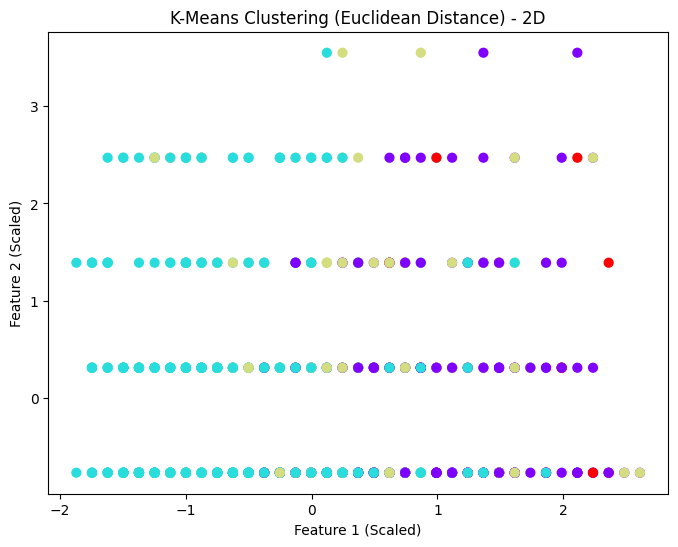

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_euclidean, cmap="rainbow", s=40)
plt.title("K-Means Clustering (Euclidean Distance) - 2D")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

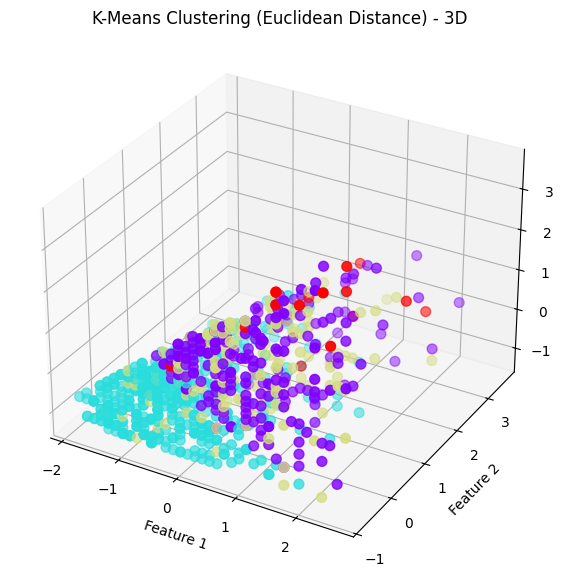

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2],
           c=labels_euclidean, cmap="rainbow", s=50)
ax.set_title("K-Means Clustering (Euclidean Distance) - 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

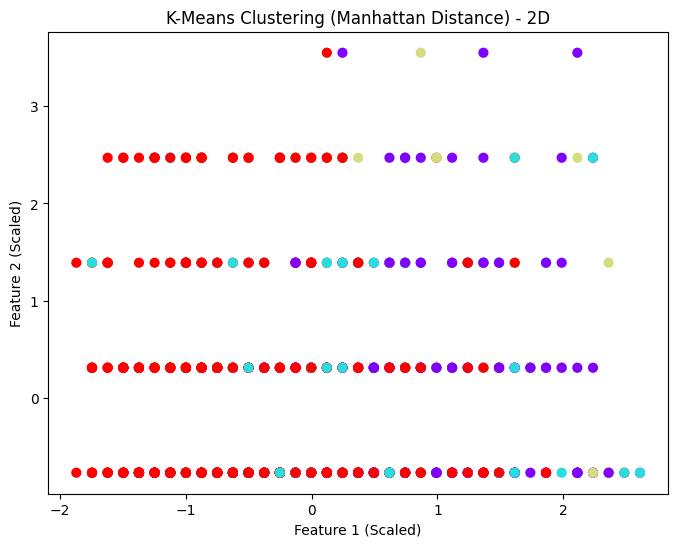

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_manhattan, cmap="rainbow", s=40)
plt.title("K-Means Clustering (Manhattan Distance) - 2D")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

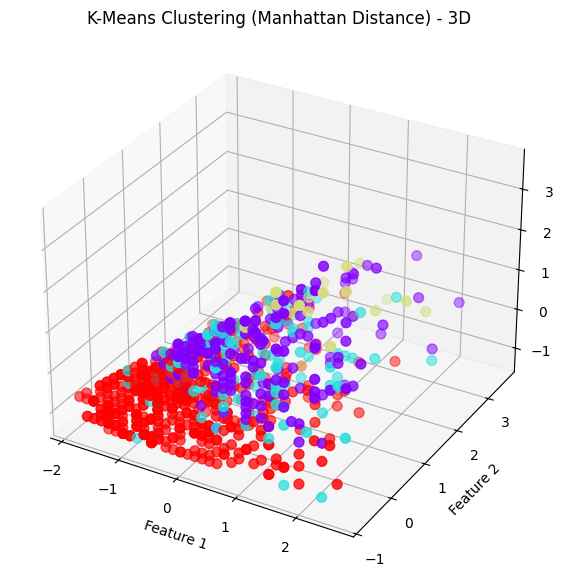

In [25]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2],
           c=labels_manhattan, cmap="rainbow", s=50)
ax.set_title("K-Means Clustering (Manhattan Distance) - 3D")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()